In [2]:
import pandas as pd 

data = pd.read_csv('happyscore_income.csv')
data.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    float64
 2   avg_satisfaction       111 non-null    float64
 3   std_satisfaction       111 non-null    float64
 4   avg_income             111 non-null    float64
 5   median_income          111 non-null    float64
 6   income_inequality      111 non-null    float64
 7   region                 111 non-null    object 
 8   happyScore             111 non-null    float64
 9   GDP                    111 non-null    float64
 10  country.1              111 non-null    object 
dtypes: float64(8), object(3)
memory usage: 9.7+ KB


In [4]:
data.describe()

,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,happyScore,GDP
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,48.729730,5.936937,2.124595,6442.751416,5186.005304,38.417805,5.421910,0.841909
std,12.364131,1.356394,0.316546,6479.533692,5587.037239,8.375557,1.180801,0.387591
min,19.000000,2.500000,1.380000,572.880000,415.480000,24.215000,2.839000,0.015300
25%,40.000000,5.100000,1.910000,1519.388684,1167.717333,32.182857,4.568000,0.509930
50%,48.000000,6.000000,2.130000,3889.320000,2646.973333,36.480000,5.268000,0.918610
75%,57.000000,7.000000,2.330000,7867.402500,6581.124643,43.380000,6.392000,1.149485
max,74.000000,8.500000,3.190000,26182.275000,22240.230000,63.726667,7.587000,1.563910


In [5]:
from sklearn.cluster import KMeans 
import numpy as np
import matplotlib.pyplot as plt 



X= data['avg_income']
y= data['happyScore']

income_happy = np.column_stack((X,y))
Km_res = KMeans(n_clusters=3).fit(income_happy)
clus_centers= Km_res.cluster_centers_
clus_centers



/home/ml/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[2.19912121e+03, 4.75472308e+00],
       [1.87593022e+04, 7.03270000e+00],
       [7.57755711e+03, 5.85080769e+00]])

Text(0.5, 0, 'Income')

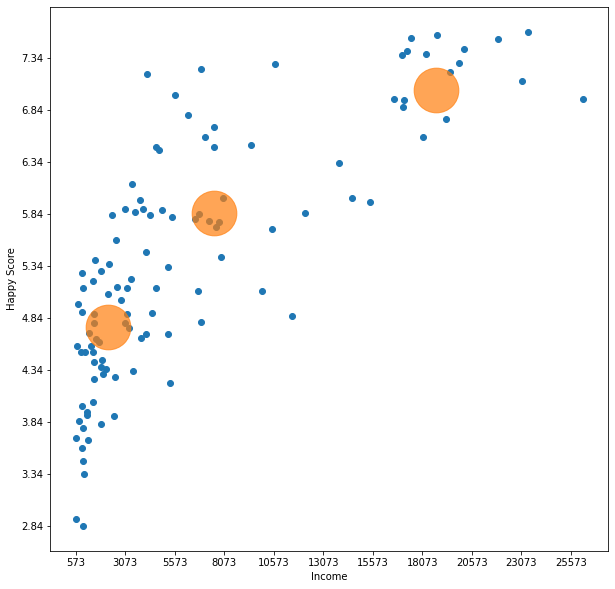

In [6]:
"""Graphic avg income vs Happy score"""
y_np = np.array(y)
x_np = np.array(X)

plt.figure(figsize=(10,10))
plt.scatter(X,y)
plt.scatter(clus_centers[:,0],clus_centers[:,1],s=2000, alpha=0.7)

plt.yticks(np.arange(y_np.min(), y_np.max(), step=0.5))
plt.xticks(np.arange(x_np.min(),x_np.max(),step=2500))
plt.ylabel('Happy Score')
plt.xlabel('Income')


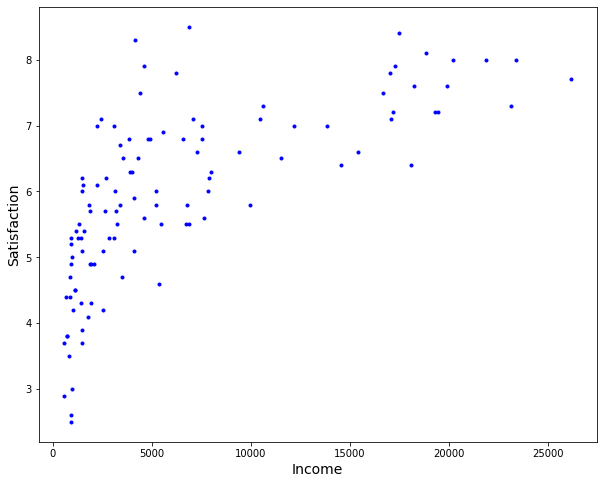

In [7]:
"""Graphic avg satisfaction vs avg income"""
plt.figure(figsize=(10,8))
plt.plot(data['avg_income'],data['avg_satisfaction'], "b.")
plt.ylabel("Satisfaction", fontsize=14)
plt.xlabel("Income", fontsize=14)
plt.show()

<Axes: >

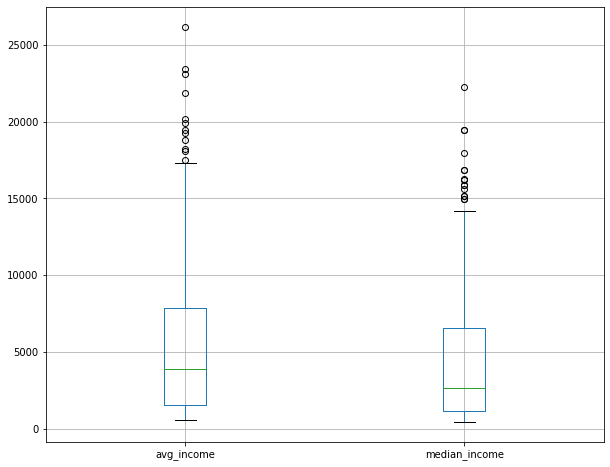

In [8]:
""" Boxplot avg income and median income"""
plt.figure(figsize=(10,8))
data.boxplot(grid=True, column=['avg_income', 'median_income'])


array([[<Axes: title={'center': 'adjusted_satisfaction'}>,
        <Axes: title={'center': 'avg_satisfaction'}>,
        <Axes: title={'center': 'std_satisfaction'}>],
       [<Axes: title={'center': 'avg_income'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'income_inequality'}>],
       [<Axes: title={'center': 'happyScore'}>,
        <Axes: title={'center': 'GDP'}>, <Axes: >]], dtype=object)

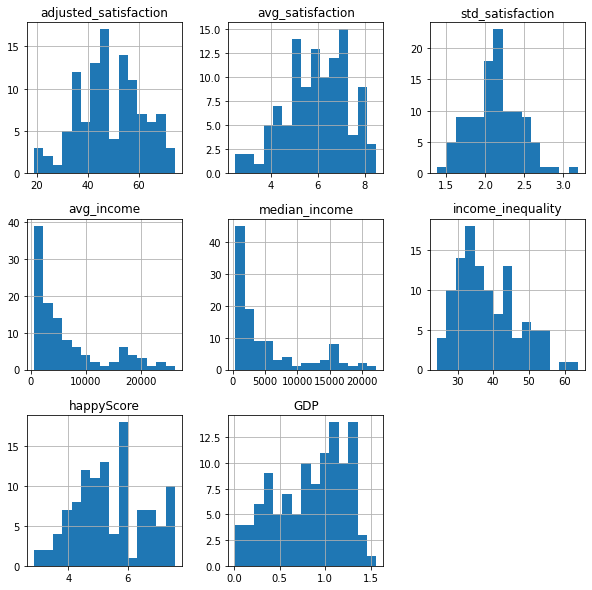

In [9]:
data.hist(figsize=(10,10), bins= 15)

array([[<Axes: xlabel='adjusted_satisfaction', ylabel='adjusted_satisfaction'>,
        <Axes: xlabel='avg_satisfaction', ylabel='adjusted_satisfaction'>,
        <Axes: xlabel='std_satisfaction', ylabel='adjusted_satisfaction'>,
        <Axes: xlabel='avg_income', ylabel='adjusted_satisfaction'>,
        <Axes: xlabel='median_income', ylabel='adjusted_satisfaction'>,
        <Axes: xlabel='income_inequality', ylabel='adjusted_satisfaction'>,
        <Axes: xlabel='happyScore', ylabel='adjusted_satisfaction'>,
        <Axes: xlabel='GDP', ylabel='adjusted_satisfaction'>],
       [<Axes: xlabel='adjusted_satisfaction', ylabel='avg_satisfaction'>,
        <Axes: xlabel='avg_satisfaction', ylabel='avg_satisfaction'>,
        <Axes: xlabel='std_satisfaction', ylabel='avg_satisfaction'>,
        <Axes: xlabel='avg_income', ylabel='avg_satisfaction'>,
        <Axes: xlabel='median_income', ylabel='avg_satisfaction'>,
        <Axes: xlabel='income_inequality', ylabel='avg_satisfaction'>,
    

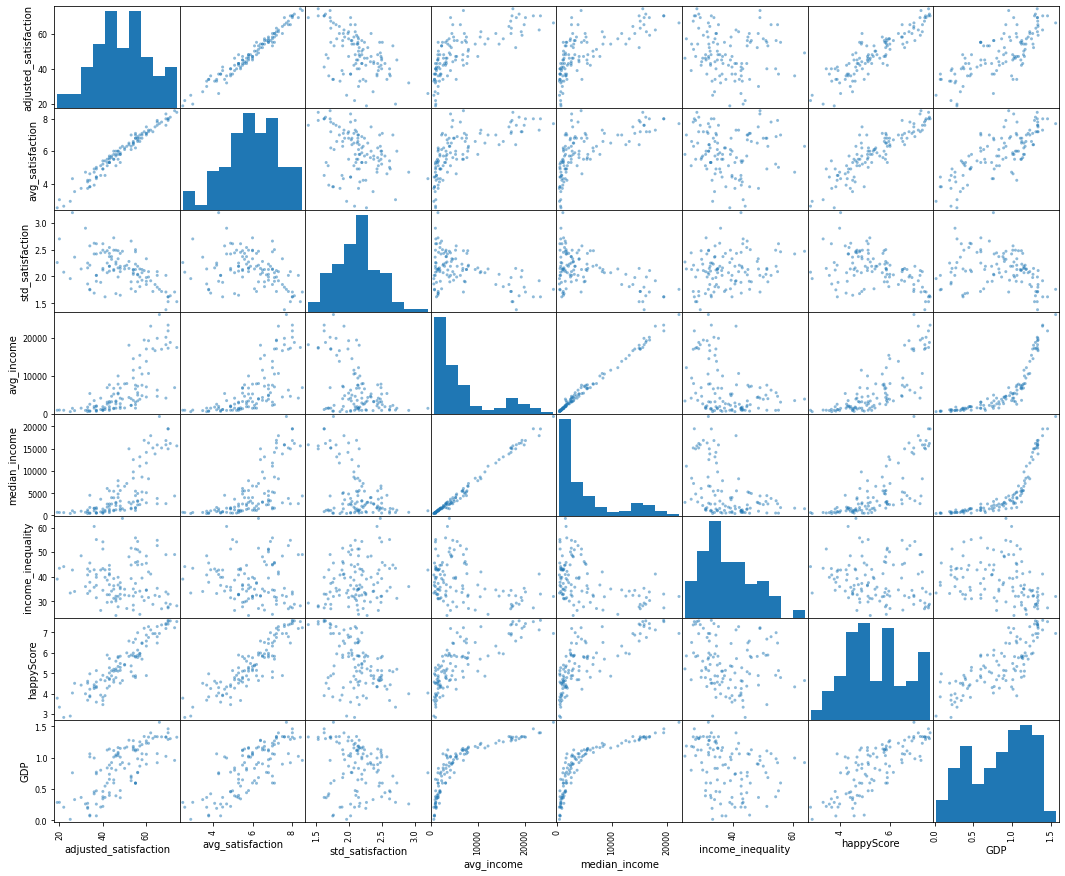

In [10]:
from pandas.plotting import scatter_matrix 
scatter_matrix(data, figsize=(18,15))

In [11]:
data.sort_values('income_inequality',inplace=True)
data.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
5,Azerbaijan,46.0,5.8,2.27,3381.600,2931.480,24.215000,'Central and Eastern Europe',5.212,1.02389,Azerbaijan
91,Slovenia,57.0,7.0,2.14,12174.765,11071.995,24.678750,'Central and Eastern Europe',5.848,1.18498,Slovenia
103,Ukraine,39.0,5.1,2.44,4129.680,3643.520,26.271111,'Central and Eastern Europe',4.681,0.79907,Ukraine
24,Czech Republic,54.0,6.6,2.13,9430.905,8363.370,26.413750,'Central and Eastern Europe',6.505,1.17898,Czech Republic
90,Sweden,67.0,7.8,1.72,17032.755,15166.605,26.950000,'Western Europe',7.364,1.33171,Sweden


Text(0.5, 0, 'inequality')

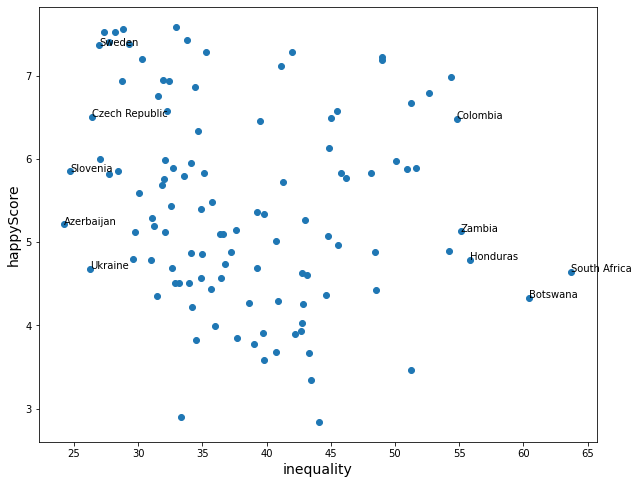

In [12]:
"""Graphic income inequality vs Happy Score"""
X = data['income_inequality']
y = data['happyScore']
z = data['country']

plt.figure(figsize=(10,8))
plt.scatter(X,y)
for i in range(111):
    if i < 5 or i >105:
        plt.text(X.iloc[i] ,y.iloc[i] ,s=z.iloc[i])
plt.ylabel('happyScore', fontsize = 14)
plt.xlabel('inequality', fontsize = 14)

In [13]:
y = data['happyScore'].values

X = data.drop(['happyScore', 'country', 'region', 'country.1'] ,axis =1)



In [14]:
X.shape, y.shape

((111, 7), (111,))

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

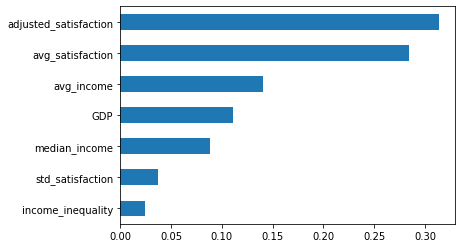

In [16]:
"""Feature importances"""
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
figure = feat_importance.sort_values(ascending=True).plot(kind='barh')
plt.show()

In [17]:
matrix_corr = data.corr()
matrix_corr.happyScore.sort_values()

/tmp/ipykernel_16464/3403097865.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = data.corr()


std_satisfaction        -0.457896
income_inequality       -0.187222
median_income            0.760328
avg_income               0.782122
GDP                      0.790061
avg_satisfaction         0.885988
adjusted_satisfaction    0.901213
happyScore               1.000000
Name: happyScore, dtype: float64

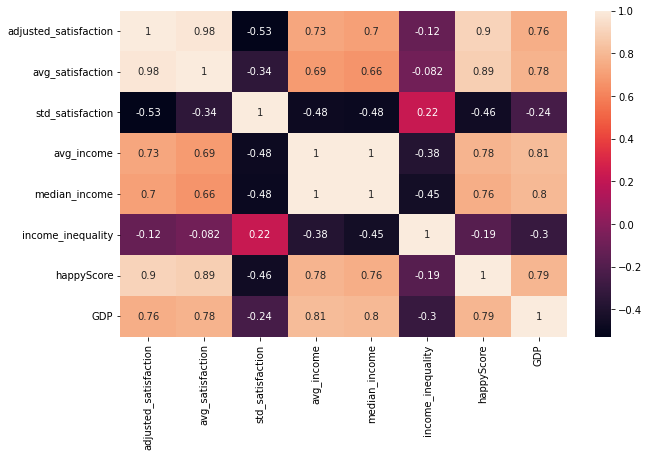

In [18]:
"""Correlation matrix"""
import seaborn as sns 
plt.figure(figsize=(10,6))
sns.heatmap(matrix_corr, annot= True)
plt.show()

In [19]:
from sklearn.preprocessing import  StandardScaler

scaler = StandardScaler()

X_scaler = scaler.fit_transform(X)


In [20]:
"""Training the model"""

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor, RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score


Lin_model = LinearRegression() 
ElasticNet_model = ElasticNet() 
Ridge_model = Ridge()
DT_model = DecisionTreeRegressor()
KNN_model = KNeighborsRegressor()
SVM_model = SVR()
RF_model = RandomForestRegressor()


X_train, X_test, y_train, y_test = train_test_split(X_scaler,y,random_state=11, test_size=0.20)

voting_model = VotingRegressor(estimators=[('LR', Lin_model), ('Elastic', ElasticNet_model), ('RF', RF_model),
                                          ('KNN', KNN_model),('DT',DT_model), ('SVM', SVM_model)],n_jobs=-1 ) 

voting_model.fit(X_train, y_train)

for clf in (Lin_model, ElasticNet_model, Ridge_model,DT_model, KNN_model,SVM_model, RF_model,  voting_model):  
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, clf.score(X_test, y_test))



LinearRegression 0.8791834815309034
ElasticNet 0.528232478972132
Ridge 0.8746904292544305
DecisionTreeRegressor 0.7353071432316564
KNeighborsRegressor 0.8377779249278603
SVR 0.8096951494431578
RandomForestRegressor 0.849657635521019
VotingRegressor 0.8537302979093807


In [21]:
def plot_learning_curves(model, X, y):

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mse(y_train[:m], y_train_predict))
        val_errors.append(mse(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)   

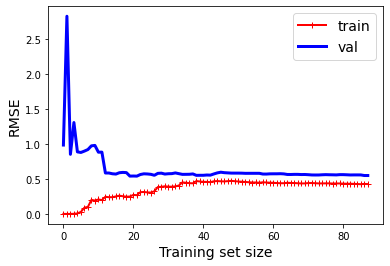

In [22]:
plot_learning_curves(Ridge(), X=X, y=y)

In [23]:
"""Save model"""
#import joblib
#filename = 'model.sav'
#joblib.dump(model, filename)

'Save model'